In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
print(tf.__version__)

2.0.0


In [4]:
# Load the mnist dataset using Keras (TF)
mnist = tf.keras.datasets.mnist

# Divide the dataset into train and test using load_data function
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

print(type(x_train))

11493376/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'>


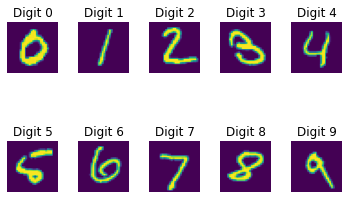

In [5]:
labels = set(y_test)

i = 0
for label in labels:
    imgs = x_test[y_test==label]
    img = imgs[0]
    
    # plot
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.title('Digit %.f' %label)
    plt.axis('off')
    plt.subplots_adjust(wspace = 0.4)
    i+=1

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2940 - accuracy: 0.9132
Epoch 2/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1418 - accuracy: 0.9578
Epoch 3/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1050 - accuracy: 0.9686
Epoch 4/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0848 - accuracy: 0.9731
Epoch 5/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0750 - accuracy: 0.9765
10000/1 - 0s - loss: 0.0368 - accuracy: 0.9778


[0.07311719852997921, 0.9778]

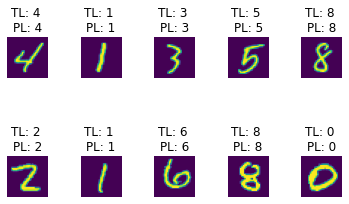

In [9]:
inds = random.sample([i for i in range(len(y_test))],10)

# predict the classes for each of the picked images
y_out = model.predict_classes(x_test[inds])

i = 0
for ind in inds:
    # plot each digit along with its True Label (TL) and Predicted Label (PL)
    img = x_test[ind]
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.title('TL: %.f \nPL: %.f' %(y_test[ind],y_out[i]))
    plt.axis('off')
    plt.subplots_adjust(wspace = 0.8)
    i+=1